# MS263 – May 8 2018

## Gridding and remote sensing

### Goals

* Compare surface chlorophyll data from the MODIS satellite and the West Coast Ocean Acidification cruise during August 5-28 2013.
* Grid cruise data using `scipy.interpolate.griddata`
* Use the xarray package to work with satellite data in NetCDF files, and on OpenDAP servers.

##### 1.)	Install the xarray and netcdf4 packages. 

In the terminal (Mac, Linux) or the Anaconda Prompt (Windows), type:

```
conda install xarray netCDF4
```

These are the packages we will be using:

In [5]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from scipy.interpolate import griddata

##### 2.) Load cruise data into Pandas, and make a a subset of all good chlorophyll data near the surface (<3 dbar).

Load csv file. Change path to file, if necessary.

In [7]:
### Change path to file, if necessary ###

filename = '../week03_wcoa_cruise/WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,parse_dates=[[8,9]])

Use Cartopy to compute east and north distances from longitude and latitude. No need to change this code.

In [8]:
p = ccrs.UTM(zone=10)
xyz = p.transform_points(ccrs.PlateCarree(),np.array(df['LONGITUDE']),np.array(df['LATITUDE']))
x = xyz[:,0]/1000 # units = km
y = xyz[:,1]/1000 

Create a subset of good chlorophyll data near the surface (pressure < 3 dbar).

In [9]:
### Insert code here ####

##### 3. Grid data

Create a regular 2D grid of x and y distances. You will need one 2D array corresponding the the x coordinates of each grid point, and another corresponding the the y coordinates of each grid point. (Hint: create two 1D arrays of evenly spaced x and y points, then use `np.meshgrid` to create the 2D arrays).

In [10]:
### Insert code here ###

Grid the data using the `griddata` function imported from `scipy.interpolate`. This function uses your sample data and grid point positions as input, and returns the estimated values at the grid points using a linear triangulation method.

In [11]:
### Insert code here ###

Contour the gridded data using `plt.contour`.

In [12]:
### Insert code here ###

##### 4. Plot the satellite and cruise data together.

Use xarray to load MODIS sattelite data in the NetCDF file. This file is an 8-day composiite obtained from the NASA ocean color website. The xarray package is similar to Pandas, but useful for data with geopgraphic coordinates that do not naturally fit into a spreadsheet-type files. 

An xarray Dataset is similar to a Pandas dataframe. Variables can be used as if they are Numpy arrays. The satellite dataset has a `chl_ocx` variable that is like a 2D array with longitude and latitude coordinates defining the shape. The dataset also contains metadata about the dataset and variables in it.

In [17]:
# Load the data
chlfile = 'A20132252013232.L3m_8D_CHL_chl_ocx_4km.nc'
chlnc = xr.open_dataset(chlfile)

chlnc

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 4320, lon: 8640, rgb: 3)
Coordinates:
  * lat      (lat) float64 89.98 89.94 89.9 89.85 89.81 89.77 89.73 89.69 ...
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 -179.8 -179.8 -179.7 ...
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    chl_ocx  (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    palette  (rgb, eightbitcolor) uint8 147 0 108 144 0 111 141 0 114 138 0 ...
Attributes:
    product_name:                      A20132252013232.L3m_8D_CHL_chl_ocx_4km.nc
    instrument:                        MODIS
    title:                             MODIS Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    8-day
    processing_version:                2014.0
    date_created:                      2015-06-26T02:50:36.000Z
    history:                

Use `np.where` to create a smaller subset of the chlorophyll data in a 2D array that only contains data in the geographic extent that we are interested in.

In [19]:
# Define the extent of the data that you want to look at 
extent = [-127, -123.5, 44.0, 49.0]

### Insert code here ###

Plot the cruise data and the satellite data on the same map. Use `plt.scatter` to plot the cruise data and `plt.pcolor` to plot the satellite data.

<IPython.core.display.Javascript object>


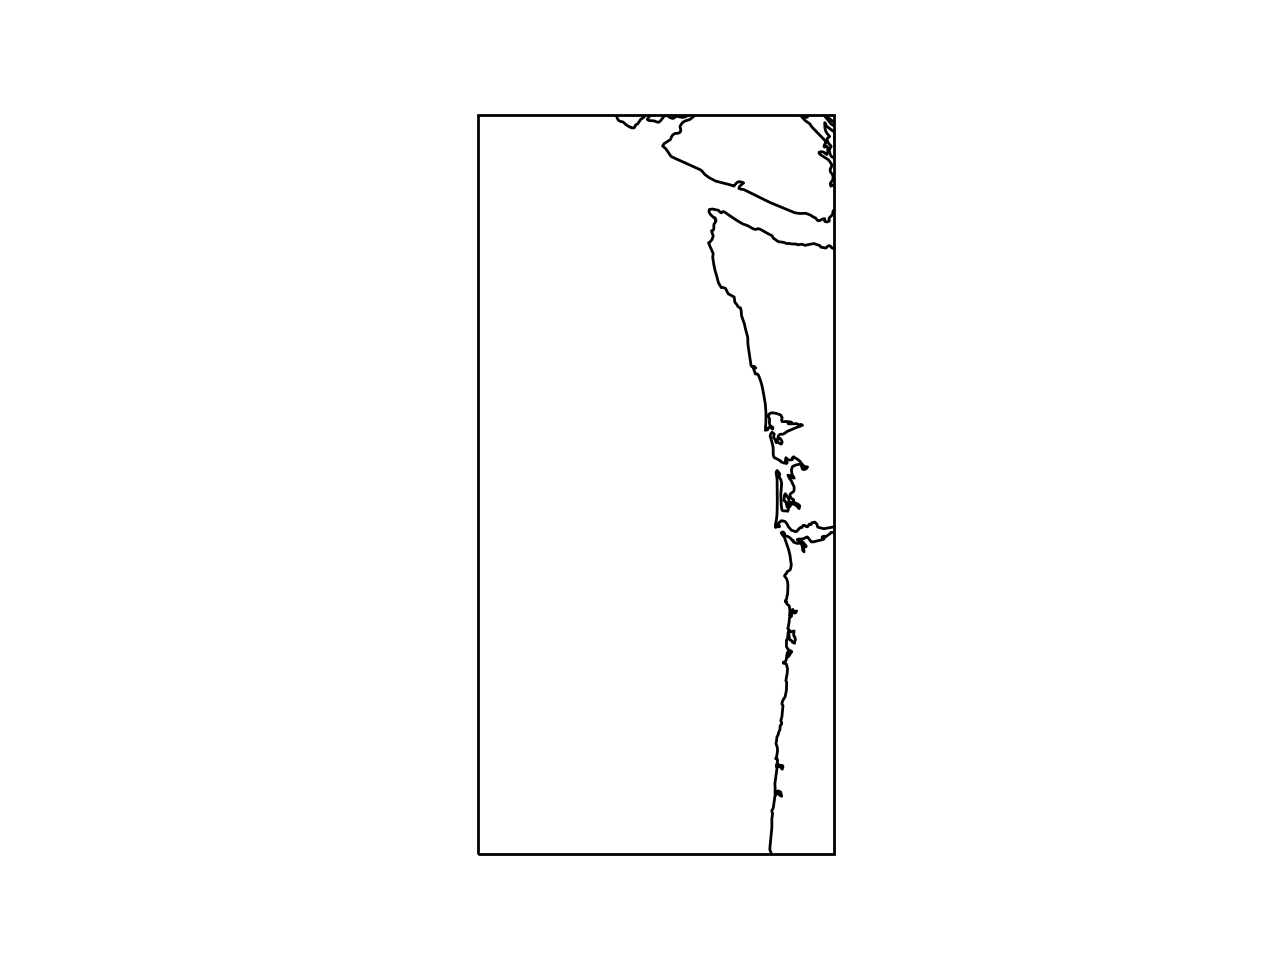

In [18]:
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_extent(extent)

### Insert code here